In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.api as sm

# and of course the actual regression (machine learning) module
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('winequality-red (2).csv')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
data.describe(include = 'all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
data.isnull()         
data.isnull().sum() 

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

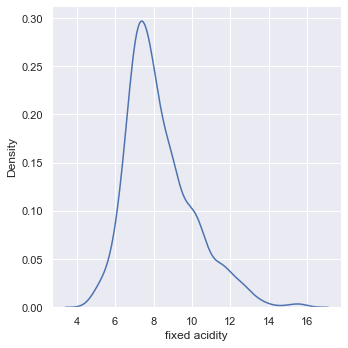

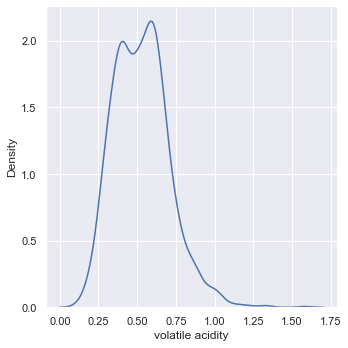

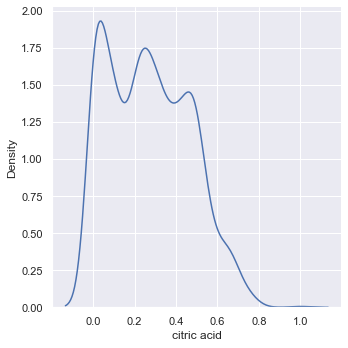

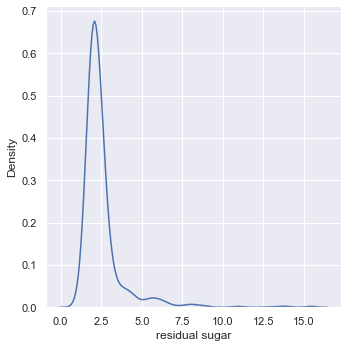

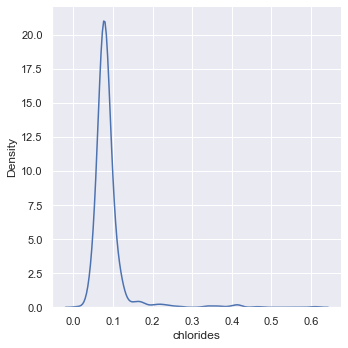

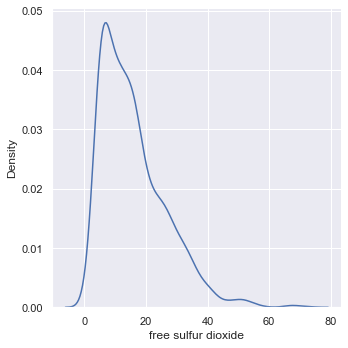

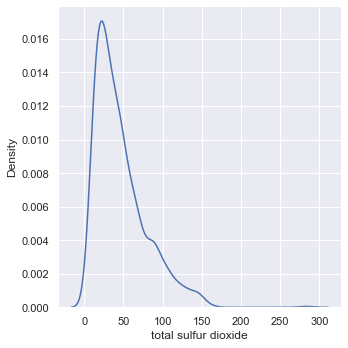

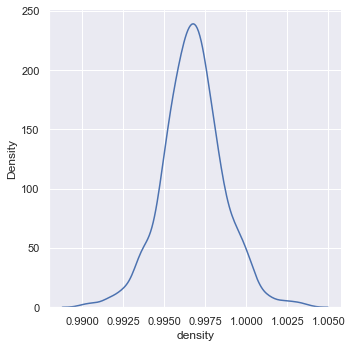

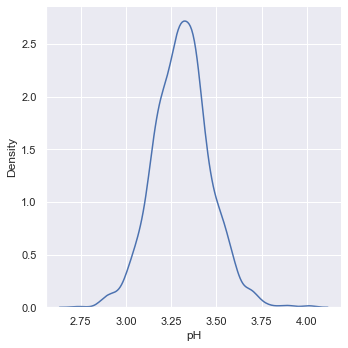

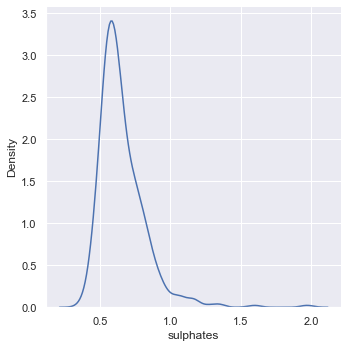

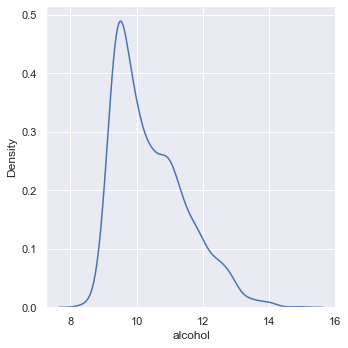

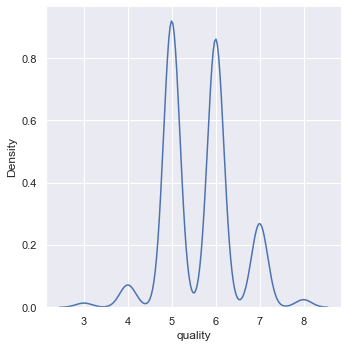

In [5]:
sns.displot(data['fixed acidity'], kind = 'kde')
sns.displot(data['volatile acidity'], kind = 'kde')
sns.displot(data['citric acid'], kind = 'kde')
sns.displot(data['residual sugar'], kind = 'kde')
sns.displot(data['chlorides'], kind = 'kde')
sns.displot(data['free sulfur dioxide'], kind = 'kde')
sns.displot(data['total sulfur dioxide'], kind = 'kde')
sns.displot(data['density'], kind = 'kde')
sns.displot(data['pH'], kind = 'kde')
sns.displot(data['sulphates'], kind = 'kde')
sns.displot(data['alcohol'], kind = 'kde')
sns.displot(data['quality'], kind = 'kde')


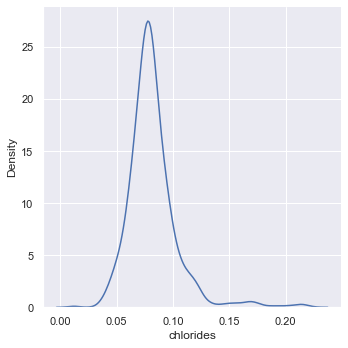

In [6]:
q = data['chlorides'].quantile(0.98)
new_chloride = data[data['chlorides']< q]
sns.displot(new_chloride['chlorides'], kind = 'kde')

In [7]:
new_chloride.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000
mean,8.321711,0.527347,0.266826,2.546456,0.081809,15.891124,46.395913,0.996741,3.314911,0.649955,10.440581,5.642401
std,1.753769,0.179492,0.192259,1.417196,0.022411,10.443219,33.017239,0.001899,0.152173,0.153941,1.065356,0.808005
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.860000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,14.000000,38.000000,0.996720,3.310000,0.620000,10.200000,6.000000
75%,9.300000,0.640000,0.420000,2.600000,0.089000,22.000000,62.000000,0.997830,3.400000,0.720000,11.100000,6.000000
max,15.900000,1.580000,0.790000,15.500000,0.222000,72.000000,289.000000,1.003690,4.010000,1.980000,14.900000,8.000000


In [8]:
data['quality'].unique() # another way to check target details 

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [9]:
data.quality.value_counts().sort_index() #Counting number of target occured out of total count

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

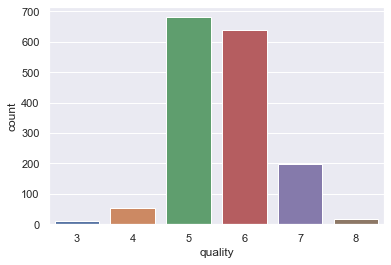

In [10]:
sns.countplot(x='quality', data=data) # plotting probability distribution function

<AxesSubplot:>

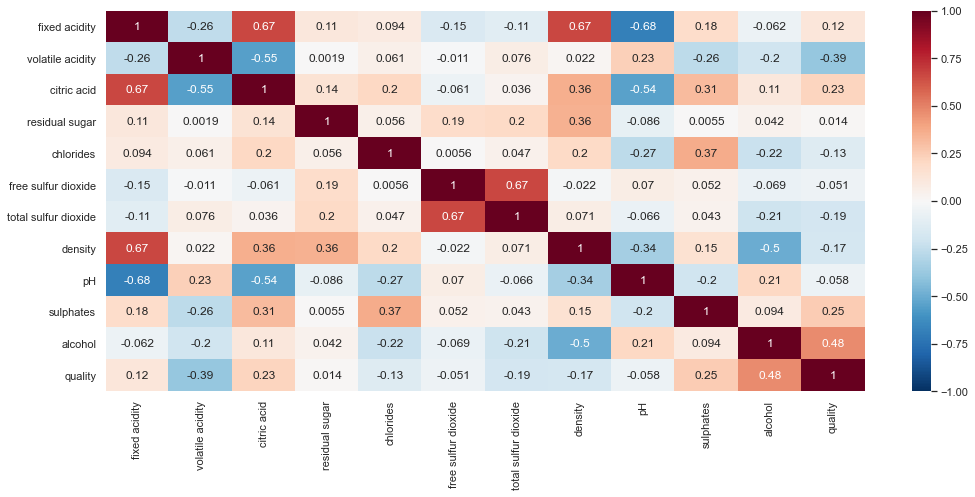

In [11]:
cor_vab = data.corr()                        #finding colrelation with other variables
plt.figure(figsize=(17, 7))
sns.heatmap(cor_vab, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

In [12]:
cor_vab['quality'].sort_values(ascending = False) #alcohol, sulphate, citric_acid, fixed_acidity- four variable are closly related

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

[Text(0.5, 0, 'quality of wine'),
 Text(0, 0.5, 'alcohol content'),
 Text(0.5, 1.0, 'variation of alcohol w.r.t quality')]

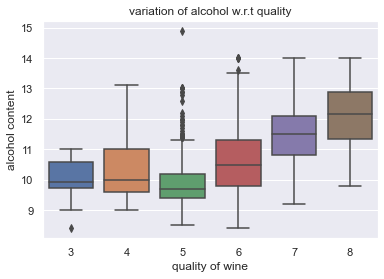

In [13]:
box_alcohol = sns.boxplot(x = 'quality', y = 'alcohol', data = data)
box_alcohol.set(xlabel='quality of wine', ylabel='alcohol content', title = 'variation of alcohol w.r.t quality')

[Text(0.5, 0, 'quality of wine'),
 Text(0, 0.5, 'sulphates content'),
 Text(0.5, 1.0, 'variation of sulphates w.r.t quality')]

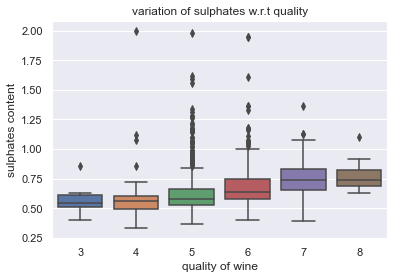

In [14]:
box_sulphate = sns.boxplot(x = 'quality', y = 'sulphates', data = data)
box_sulphate.set(xlabel='quality of wine', ylabel='sulphates content', title = 'variation of sulphates w.r.t quality')

[Text(0.5, 0, 'quality of wine'),
 Text(0, 0.5, 'citric acid content'),
 Text(0.5, 1.0, 'variation of citric acid  w.r.t quality')]

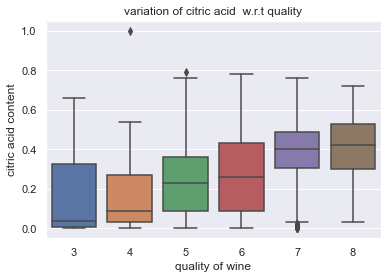

In [15]:
box_citric_acid  = sns.boxplot(x = 'quality', y = 'citric acid', data = data)
box_citric_acid .set(xlabel='quality of wine', ylabel='citric acid content', title = 'variation of citric acid  w.r.t quality')

[Text(0.5, 0, 'quality of wine'),
 Text(0, 0.5, 'fixed acidity content'),
 Text(0.5, 1.0, 'variation of fixed acidity  w.r.t quality')]

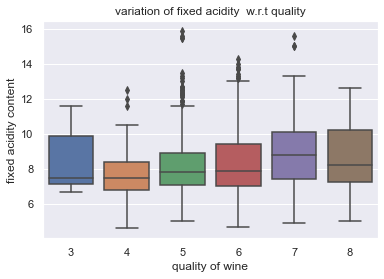

In [16]:
box_fixed_acidity = sns.boxplot(x = 'quality', y = 'fixed acidity', data = data)
box_fixed_acidity.set(xlabel='quality of wine', ylabel='fixed acidity content', title = 'variation of fixed acidity  w.r.t quality')

In [17]:
conditions = [(data['quality'] >= 7),(data['quality'] <= 4)]
rating = ['good', 'bad']
data['rating'] = np.select(conditions, rating, default='average')
data.rating.value_counts()

average    1319
good        217
bad          63
Name: rating, dtype: int64

In [18]:
data.groupby('rating').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
rating,,,,,,,,,,,,
average,8.254284,0.538560,0.258264,2.503867,0.088973,16.368461,48.946929,0.996867,3.311296,0.647263,10.252717,5.483700
bad,7.871429,0.724206,0.173651,2.684921,0.095730,12.063492,34.444444,0.996689,3.384127,0.592222,10.215873,3.841270
good,8.847005,0.405530,0.376498,2.708756,0.075912,13.981567,34.889401,0.996030,3.288802,0.743456,11.518049,7.082949


In [26]:
x = ['alcohol']
y = ['quality']

In [28]:
new_vab = sm.add_constant(x)
result = sm.OLS(y,new_vab).fit()      #regression for two variable(size,view) 
result.summary()
                

TypeError: cannot perform reduce with flexible type